# Lab 5 ASTR 400B 


In [115]:
# ABHINAV VATSA
# 400B
# Import Modules 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy import constants as const # import astropy constants
import astropy.units as u

# Part A :  Mass to Light Ratios 

Wolf et al. 2010 

$M(<R_{half}) = \frac {4}{G}\sigma^2 R_e$

Where $R_{half}$ = 3D half mass radius 
and $R_e$ is the 2D half mass radius of stars (observed)

Determine which of the following two systems are galaxies:

The system 47 Tuc is observed with:  $\sigma = 17.3$ km/s, $R_e = 0.5$ pc, $L_v \sim 10^5 L_\odot$ 

The system Willman I is observed with: $\sigma = 4.3$ km/s, $R_e = 25$ pc, $L_v = 10^3 L_\odot$

In [28]:
# Gravitational Constant in the desired units
# kpc^3/Gyr^2/Msun
Grav = const.G.to(u.kpc**3/u.Gyr**2/u.Msun)

In [38]:
from astropy import units as u
from astropy.constants import G

def WolfMass(sigma, re):
    """Function that defines the Wolf mass estimator from Wolf+ 2010.

    PARAMETERS
    ----------
    sigma : `~astropy.units.Quantity`
        Velocity dispersion with units
    re : `~astropy.units.Quantity`
        Half-light radius with units

    RETURNS
    -------
    mWolf : `~astropy.units.Quantity`
        Estimated mass using the Wolf mass estimator in solar masses
    """
    # Ensure inputs have the correct units
    sigma = sigma * u.km / u.s if not isinstance(sigma, u.Quantity) else sigma
    re = re * u.kpc if not isinstance(re, u.Quantity) else re

    sigmaKpcGyr = sigma.to(u.kpc/u.Gyr)  # Convert velocity dispersion to kpc/Gyr
    mWolf = (4 / Grav) * sigmaKpcGyr**2 * re  # Wolf mass estimator

    return mWolf




In [40]:
mass1 = WolfMass(17.3, 0.5)
mass2 = WolfMass(4.3, 25)

print(mass1)
print(mass2)

139174962.55280226 solMass
429908292.559276 solMass


# Part B :  Stellar to Halo Mass Relation

Following the work of [Moster et al. 2013 (MNRAS, 428, 3121)](https://ui.adsabs.harvard.edu/abs/2013MNRAS.428.3121M/abstract)


`Equation 2:`                  $ \frac{m}{M} = 2N \left [ \left ( \frac{M}{M_1} \right)^{-\beta} + \left (\frac{M}{M_1} \right)^{\gamma} \right]$ 

$m$ = stellar mass, $M$ = halo mass

`Equation 11:`        log $M_1(z) = M_{10} + M_{11} \frac{z}{z+1} $ 

`Equation 12:`        $N(z) = N_{10} + N_{11} \frac{z}{z+1} $

`Equation 13:`         $\beta(z) = \beta_{10} + \beta_{11} \frac{z}{z+1} $

`Equation 14:`         $\gamma(z) = \gamma_{10} + \gamma_{11} \frac{z}{z+1} $

# Q1 

Modify the class below by adding a function called `StellarMass` that uses the `SHMratio` function and returns the stellar mass.

In [72]:
class AbundanceMatching:
    """ Class to define the abundance matching relations from 
    Moster et al. 2013, which relate the stellar mass of a galaxy
    to the expected dark matter halo mass, according to 
    Lambda Cold Dark Matter (LCDM) theory """
    
    
    def __init__(self, mhalo, z):
        """ Initialize the class
        
        PARAMETERS
        ----------
            mhalo: float
                Halo mass in Msun
            z: float
                redshift
        """
        
        #initializing the parameters:
        self.mhalo = mhalo # Halo Mass in Msun
        self.z = z  # Redshift
        
        
    def logM1(self):
        """eq. 11 of Moster 2013
        OUTPUT: 
            M1: float 
                characteristic mass in log(Msun)
        """
        M10      = 11.59
        M11      = 1.195 
        return M10 + M11*(self.z/(1+self.z))  
    
    
    def N(self):
        """eq. 12 of Moster 2013
        OUTPUT: 
            Normalization for eq. 2
        """
        N10      = 0.0351
        N11      = -0.0247
    
        return N10 + N11*(self.z/(1+self.z))
    
    
    def Beta(self):
        """eq. 13 of Moster 2013
        OUTPUT:  power of the low mass slope"""
        beta10      = 1.376
        beta11      = -0.826
    
        return beta10 + beta11*(self.z/(1+self.z))
    
    def Gamma(self):
        """eq. 14 of Moster 2013
        OUTPUT: power of the high mass slope """
        gamma10      = 0.608
        gamma11      = 0.329
    
        return gamma10 + gamma11*(self.z/(1+self.z))
    
    
    def SHMratio(self):
        """ 
        eq. 2 of Moster + 2013
        The ratio of the stellar mass to the halo mass
        
        OUTPUT: 
            SHMratio float
                Stellar mass to halo mass ratio
        """
        M1 = 10**self.logM1() # Converting characteristic mass 
        # to Msun from Log(Msun)
        
        A = (self.mhalo/M1)**(-self.Beta())  # Low mass end
        
        B = (self.mhalo/M1)**(self.Gamma())   # High mass end
        
        Norm = 2*self.N() # Normalization
    
        SHMratio = Norm*(A+B)**(-1)
    
        return SHMratio 
    
 # Q1: add a function to the class that takes the SHM ratio and returns 
# The stellar mass 
    def stellar_mass(self):
        """
        Compute the stellar mass from the SHM ratio.
        
        OUTPUT:
            stellar_mass: float 
                Stellar mass in Msun
        """
        return self.SHMratio() * self.mhalo  # Stellar Mass = SHM Ratio * Halo Mass
        


# Part C : Plot the Moster Relation

Reproduce the below figure from Moster + 2013 
Plot this for z=0, 0.5, 1, 2

![mos](./MosterFig.png)

In [9]:
mh = np.logspace(10,15,1000) # Logarithmically spaced array


In [99]:
# Define Instances of the Class for each redshift
MosterZ0 = [AbundanceMatching(m, 0).stellar_mass() for m in mh]  # z = 0
MosterZ1 = [AbundanceMatching(m, 1).stellar_mass() for m in mh]  # z = 1
MosterZ2 = [AbundanceMatching(m, 2).stellar_mass() for m in mh]  # z = 2

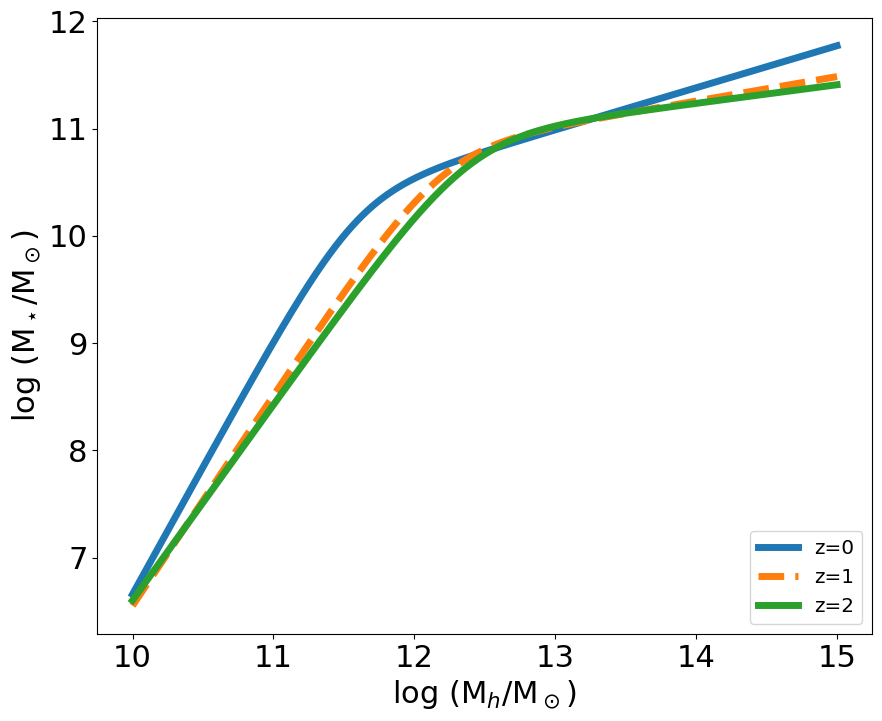

In [101]:

fig,ax = plt.subplots(figsize=(10,8))


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Convert halo mass and stellar mass to log scale
log_mh = np.log10(mh)
log_MosterZ0 = np.log10(MosterZ0)
log_MosterZ1 = np.log10(MosterZ1)
log_MosterZ2 = np.log10(MosterZ2)


# Plot z = 0
plt.plot(log_mh, log_MosterZ0, linewidth=5, label='z=0')


# Plot z = 1
plt.plot(log_mh, log_MosterZ1, linewidth=5, linestyle='dashed', label='z=1')


# Plot z = 2
plt.plot(log_mh, log_MosterZ2, linewidth=5, label='z=2')


# Axes labels 
plt.xlabel('log (M$_h$/M$_\\odot$)', fontsize=22) 
plt.ylabel('log (M$_\\star$/M$_\\odot$)', fontsize=22)

# Legend
plt.legend(loc='lower right',fontsize='x-large')

# save the file 
plt.savefig("AbundanceMatching_Lab5.png")



# Part D

# Q1

In studies that have modeled the Magellanic Clouds prior to 2010, the LMC is traditioanlly modeled with a halo (dark matter) mass of order $3 \times 10^{10}$M$_\odot$.  

## A) 
According to $\Lambda$CDM theory, what should be the stellar mass of the LMC halo be at z=0?  

## B) 
How does this stellar mass compare to the actual observed stellar mass of the LMC at the present day of ~$3 \times 10^9$ M$_\odot$ ? 

## C) 
What is the $\Lambda$CDM expected halo mass for the LMC (using Abundance Matching)? 

In [107]:
### A
lmc_halo_mass = 3e10  # 3 × 10^10 M_sun
lmc_abundance = AbundanceMatching(lmc_halo_mass, z=0)
lmc_stellar_mass = lmc_abundance.stellar_mass()
print(f"Expected Stellar Mass of LMC at z=0: {lmc_stellar_mass:.2e} M_sun")

###B 
lmc_halo_mass = 3e10  # Traditional halo mass of LMC in solar masses
observed_stellar_mass = 3e9  # Observed stellar mass of LMC in solar masses

lmc_abundance = AbundanceMatching(lmc_halo_mass, z=0) 
predicted_stellar_mass = lmc_abundance.stellar_mass() # Compute the predicted stellar mass using the AbundanceMatching class

mass_ratio = predicted_stellar_mass / observed_stellar_mass # Compute the ratio

print(f"CDM Predicted Stellar Mass (z=0): {predicted_stellar_mass:.2e} M_sun")
print(f"Observed Stellar Mass: {observed_stellar_mass:.2e} M_sun")
print(f"Ratio (CDM Predicted / Observed): {mass_ratio:.2f}")


###C
lmc_stellar_obs = 3e9  # Observed stellar mass
expected_halo_mass = lmc_stellar_obs / lmc_abundance.SHMratio()
print(f"Expected Halo Mass of LMC from Abundance Matching: {expected_halo_mass:.2e} M_sun")



Expected Stellar Mass of LMC at z=0: 6.16e+07 M_sun
CDM Predicted Stellar Mass (z=0): 6.16e+07 M_sun
Observed Stellar Mass: 3.00e+09 M_sun
Ratio (CDM Predicted / Observed): 0.02
Expected Halo Mass of LMC from Abundance Matching: 1.46e+12 M_sun


# Q2

## A) 
What is the expected stellar mass of an L* galaxy at z=0? 

## B)
What is the expected stellar mass of an L* galaxy at z = 2? 

In [111]:
# Halo mass for an L* galaxy
L_star_halo_mass = 1e12  # in solar masses

# Create an instance of AbundanceMatching for z=0
L_star_z0 = AbundanceMatching(L_star_halo_mass, z=0)

# Find the characteristic mass (M1) for z=0
M1halo_z0 = L_star_z0.logM1()
print(f'Log M1 for L* galaxy at z=0: {M1halo_z0}')

# Compute the expected stellar mass at z=0
stellar_mass_z0 = L_star_z0.stellar_mass()
print(f'Expected Stellar Mass of an L* Galaxy at z=0: {stellar_mass_z0:.2e} M_sun')

# Create an instance of AbundanceMatching for z=2
L_star_z2 = AbundanceMatching(L_star_halo_mass, z=2)

# Compute the expected stellar mass at z=2
stellar_mass_z2 = L_star_z2.stellar_mass()
print(f'Expected Stellar Mass of an L* Galaxy at z=2: {stellar_mass_z2:.2e} M_sun')


Log M1 for L* galaxy at z=0: 11.59
Expected Stellar Mass of an L* Galaxy at z=0: 3.43e+10 M_sun
Expected Stellar Mass of an L* Galaxy at z=2: 1.45e+10 M_sun
